Import Dataset

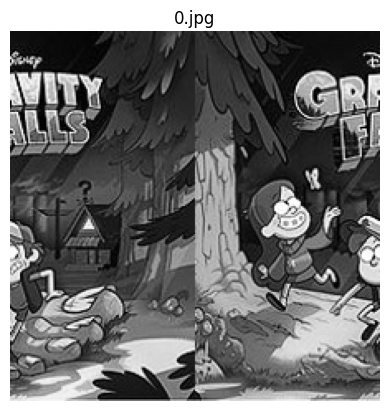

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

folder = "dataset/puzzle_2x2"

# List all files
files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

if files:  # Check if the folder is not empty
    first_file = files[0]
    img_path = os.path.join(folder, first_file)
    
    # Read and convert to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Display
    plt.imshow(gray, cmap='gray')
    plt.title(first_file)
    plt.axis('off')
    plt.show()


Noise Reduction

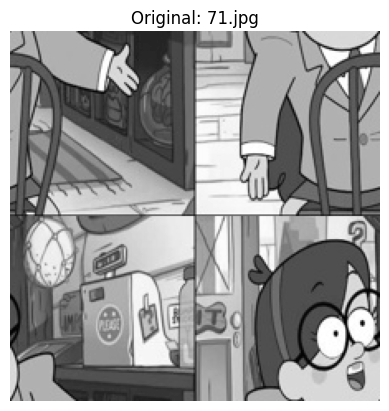

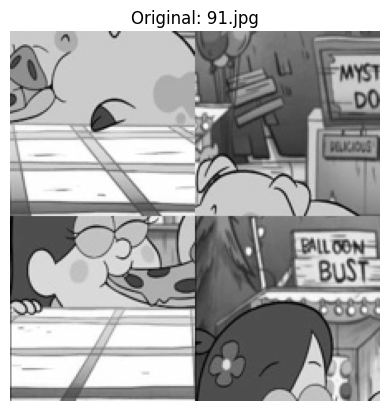

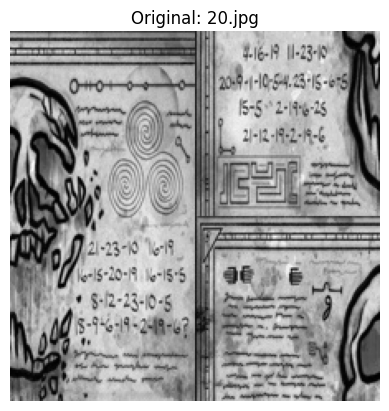

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random

folder = "dataset/puzzle_2x2"

# List all image files
files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# Pick 3 random images
sample_files = random.sample(files, min(3, len(files)))

for filename in sample_files:
    img_path = os.path.join(folder, filename)
    
    # Read image
    img = cv2.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Display original grayscale image
    plt.imshow(gray, cmap='gray')
    plt.title(f"Original: {filename}")
    plt.axis('off')
    plt.show()


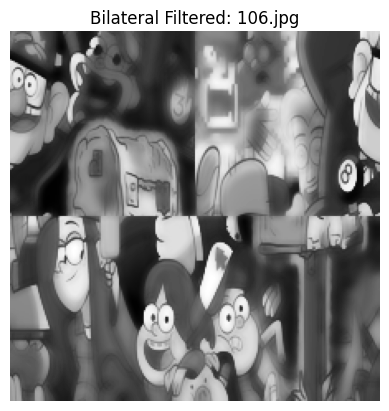

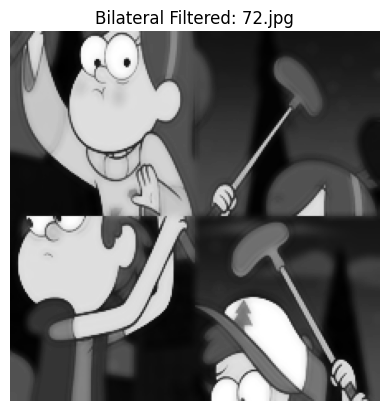

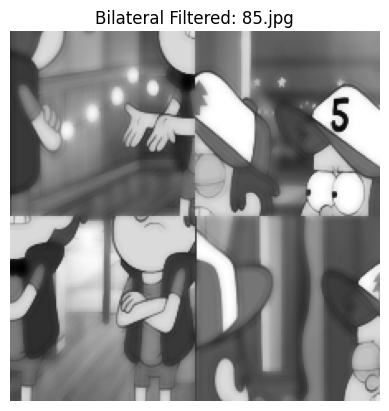

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import random


folder = "dataset/puzzle_2x2"

# List all image files
files = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# Pick 3 random images (or fewer if folder has less than 3)
sample_files = random.sample(files, min(3, len(files)))


for filename in sample_files:
    img_path = os.path.join(folder, filename)
    
    # Read image
    img = cv2.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filtering
    # Arguments: (image, diameter, sigmaColor, sigmaSpace)
    bilateral = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Display
    plt.imshow(bilateral, cmap='gray')
    plt.title(f"Bilateral Filtered: {filename}")
    plt.axis('off')
    plt.show()


Image Enhancement

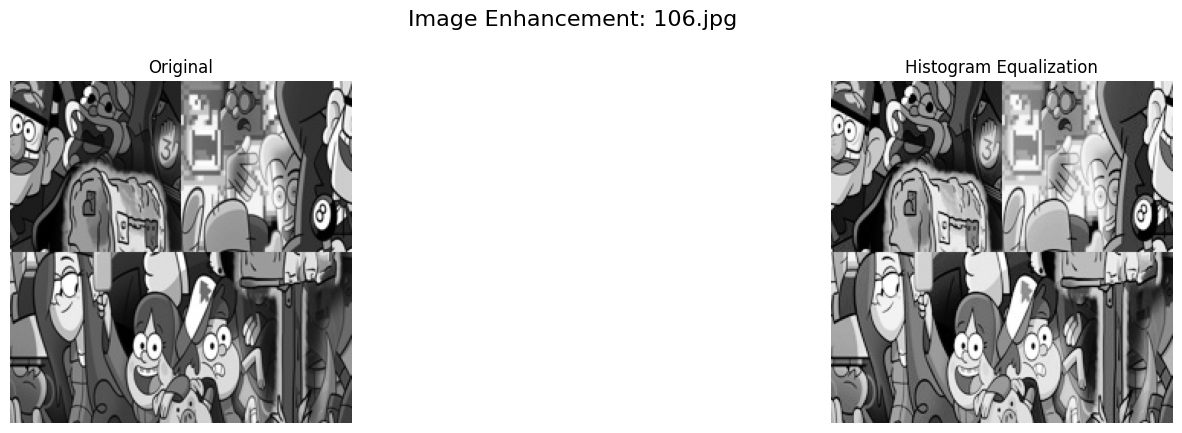

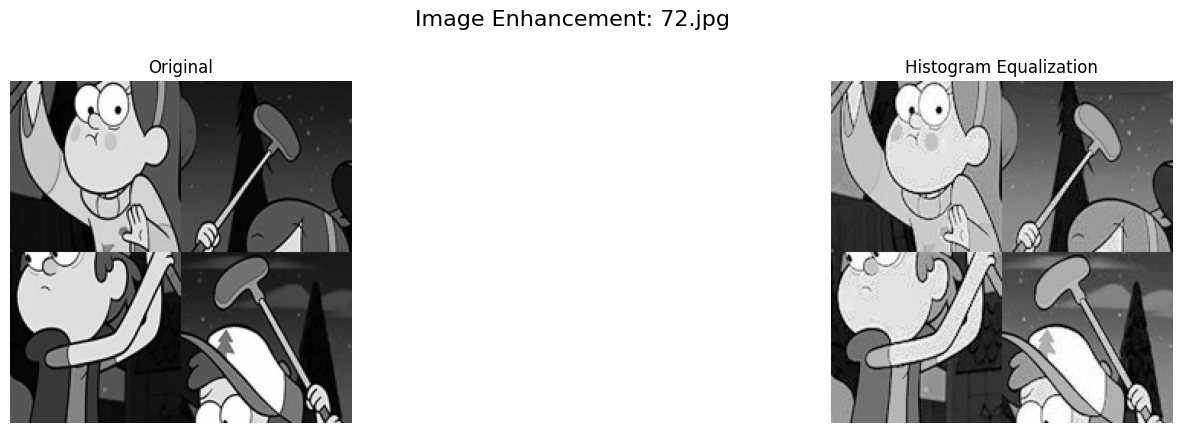

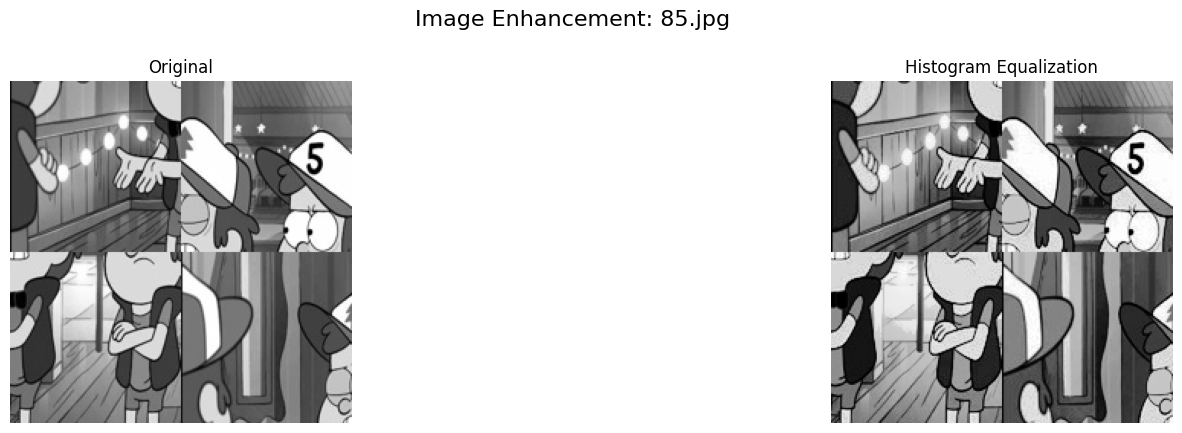

In [ ]:
for filename in sample_files:
    img_path = os.path.join(folder, filename)
    
    # Read image
    img = cv2.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # # --- Laplacian Enhancement ---
    # laplacian = cv2.Laplacian(gray, cv2.CV_64F)  # CV_64F to prevent overflow
    # laplacian = cv2.convertScaleAbs(laplacian)    # Convert back to 0-255
    
    # --- Histogram Equalization ---
    hist_eq = cv2.equalizeHist(gray)
    
    # Display images side by side
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # plt.subplot(1,3,2)
    # plt.imshow(laplacian, cmap='gray')
    # plt.title('Laplacian')
    # plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(hist_eq, cmap='gray')
    plt.title('Histogram Equalization')
    plt.axis('off')
    
    plt.suptitle(f"Image Enhancement: {filename}", fontsize=16)
    plt.show()

Background Removal

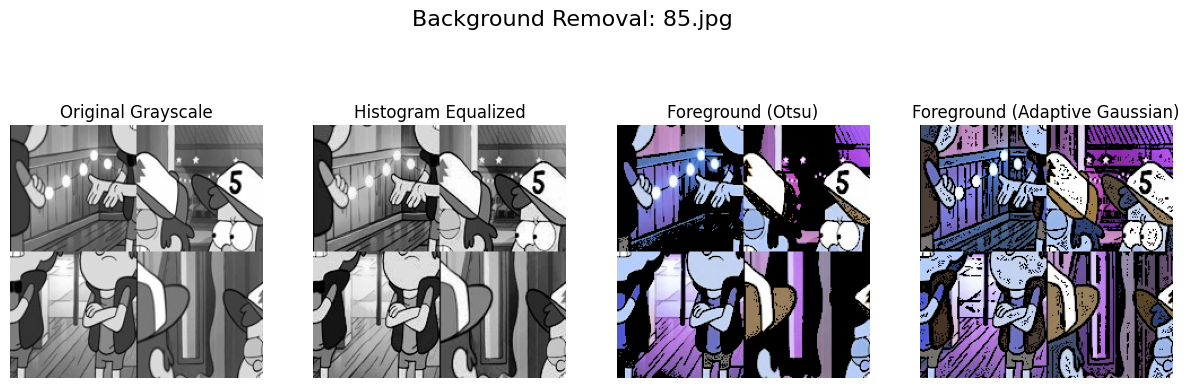

In [ ]:
_, otsu_thresh = cv2.threshold(hist_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
foreground_otsu = cv2.bitwise_and(img, img, mask=otsu_thresh)

# --- Adaptive Gaussian Thresholding ---
adaptive_gauss = cv2.adaptiveThreshold(hist_eq, 255, 
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                      cv2.THRESH_BINARY, 11, 2)
foreground_adaptive = cv2.bitwise_and(img, img, mask=adaptive_gauss)

# Display results
plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(hist_eq, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(foreground_otsu)
plt.title("Foreground (Otsu)")
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(foreground_adaptive)
plt.title("Foreground (Adaptive Gaussian)")
plt.axis('off')

plt.suptitle(f"Background Removal: {filename}", fontsize=16)
plt.show()

In [ ]:
import numpy as np
import cv2

In [ ]:
!pip install ipywidgets

In [ ]:
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

# Read image
img = cv2.imread("dataset/puzzle_2x2/2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)

def show_threshold(thresh_val=127, block_size=11, C=2):
    # Simple threshold
    _, simple_thresh = cv2.threshold(hist_eq, thresh_val, 255, cv2.THRESH_BINARY)
    foreground_simple = cv2.bitwise_and(img, img, mask=simple_thresh)
    
    # Adaptive Gaussian Thresholding
    # Ensure block_size is odd and >=3
    block_size = max(3, block_size)
    if block_size % 2 == 0:
        block_size += 1
    adaptive_gauss = cv2.adaptiveThreshold(hist_eq, 255,
                                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                           cv2.THRESH_BINARY,
                                           block_size, C)
    foreground_adaptive = cv2.bitwise_and(img, img, mask=adaptive_gauss)
    
    # Display results
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,4,1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.imshow(hist_eq, cmap='gray')
    plt.title('Histogram Equalized')
    plt.axis('off')
    
    plt.subplot(1,4,3)
    plt.imshow(foreground_simple)
    plt.title(f"Simple Threshold: {thresh_val}")
    plt.axis('off')
    
    plt.subplot(1,4,4)
    plt.imshow(foreground_adaptive)
    plt.title(f"Adaptive Gaussian: bs={block_size}, C={C}")
    plt.axis('off')
    
    plt.show()

# Interactive sliders
interact(show_threshold,
         thresh_val=widgets.IntSlider(min=0, max=255, step=1, value=127),
         block_size=widgets.IntSlider(min=3, max=51, step=2, value=11),
         C=widgets.IntSlider(min=-20, max=20, step=1, value=2));


In [ ]:
img = cv2.imread("dataset\\puzzle_2x2\\2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Image", gray)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("dataset/puzzle_2x2/2.jpg")


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Gaussian blur using separable filter ---
ksize = 5
sigma = 1.0
gauss_kernel_1d = cv2.getGaussianKernel(ksize, sigma)
blurred = cv2.sepFilter2D(gray, -1, gauss_kernel_1d, gauss_kernel_1d)

# Thresholding to get binary mask
ret, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # Find largest contour (assumed foreground)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create mask
    mask = np.zeros(gray.shape, dtype=np.uint8)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    
    # Apply mask to original image
    result = cv2.bitwise_and(img, img, mask=mask)
    
    # Display results
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Foreground Extracted")
    plt.axis('off')
    
    plt.show()
else:
    print("No contours found.")


Morphological Cleanup

In [ ]:
# 

Segmentation

In [ ]:
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

Descriptor storage

In [ ]:
x, y, w, h = cv2.boundingRect(c)
piece = img[y:y+h, x:x+w]
mask = clean[y:y+h, x:x+w]
plt.imshow(cv2.cvtColor(piece, cv2.COLOR_BGR2RGB))
plt.title("Extracted Puzzle Piece")
